# Feature Scaling & Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score


### Load data

In [2]:
df = sns.load_dataset('titanic')
df["adult_male"] = df["adult_male"].astype(str)
df["alone"] = df["alone"].astype(str)

In [3]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
606,0,3,male,30.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
294,0,3,male,24.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
235,0,3,female,NaN,0,0,7.5500,S,Third,woman,False,NaN,Southampton,no,True


In [4]:
df.describe(include='all')

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Split data

In [35]:
# Split Data to train and test 
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

# Split train data to train and val
train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [36]:
df.shape

(182, 15)

In [37]:
train.shape

(116, 15)

In [38]:
val.shape

(29, 15)

In [39]:
test.shape

(37, 15)

In [40]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
581,1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
248,1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False
621,1,1,male,42.0,1,0,52.5542,S,First,man,True,D,Southampton,yes,False
309,1,1,female,30.0,0,0,56.9292,C,First,woman,False,E,Cherbourg,yes,True
823,1,3,female,27.0,0,1,12.4750,S,Third,woman,False,E,Southampton,yes,False


In [41]:
train.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male       object
deck           category
embark_town      object
alive            object
alone            object
dtype: object

In [42]:
test_numeric = cleaner(test)

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

pred_test = lr.predict(X_test)


### Features Selection (Numerical features)

In [43]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 
    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()


    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [44]:
train_numeric.sample(5)

,survived,pclass,age,sibsp,parch,fare
75,0,3,25.0,0,0,7.65
632,1,1,32.0,0,0,30.50
462,0,1,47.0,0,0,38.50
539,1,1,22.0,0,2,49.50
193,1,2,3.0,1,1,26.00


In [45]:
train_numeric["survived"].value_counts(normalize=True)

1    0.681034
0    0.318966
Name: survived, dtype: float64

In [46]:
test["survived"].value_counts(normalize=True)

1    0.648649
0    0.351351
Name: survived, dtype: float64

### split data to X, y

In [47]:
# Create X, y train and validation sets

target = "survived"

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [48]:
X_train.head()

,pclass,age,sibsp,parch,fare
581,1,39.0,1,1,110.8833
248,1,37.0,1,1,52.5542
621,1,42.0,1,0,52.5542
309,1,30.0,0,0,56.9292
823,3,27.0,0,1,12.4750


### Model (Numaric features)

In [49]:
lr = LogisticRegression() # Create the model

lr.fit(X_train, y_train) # Fit the model

lr.score(X_val, y_val) # Score the model

0.7241379310344828

### Testing

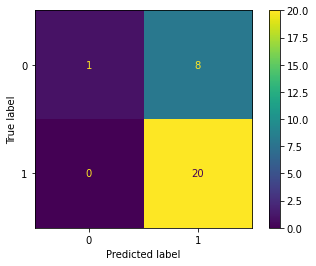

In [50]:
plot_confusion_matrix(lr, X_val, y_val);

In [51]:
preds = lr.predict(X_val)

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.71      1.00      0.83        20

    accuracy                           0.72        29
   macro avg       0.86      0.56      0.52        29
weighted avg       0.80      0.72      0.64        29



### Features Enginering

In [52]:
one_hot = OneHotEncoder()

col_names = ["who"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_val = one_hot.transform(val[col_names]).toarray()

one_hot_df_test = one_hot.transform(test[col_names]).toarray()

In [53]:
one_hot.categories_

[array(['child', 'man', 'woman'], dtype=object)]

In [54]:
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['who_child', 'who_man', 'who_woman']

In [55]:
# create dataframe for oneHot 
oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)


oh_df_test = pd.DataFrame(
    one_hot_df_test,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(116, 3)
(29, 3)


In [56]:
train_new = X_train.merge(
    oh_df, # Dataframe to merge with train
    on=X_train.index # column to use to merge on
).set_index("key_0")

# Doing the same thing as above but to the validation data
val_new = X_val.merge(oh_df_val, on=X_val.index).set_index("key_0")

test_new = X_test.merge(oh_df_test, on=X_test.index).set_index("key_0")

In [57]:
train_new.sample(5)

,pclass,age,sibsp,parch,fare,who_child,who_man,who_woman
key_0,,,,,,,,
512,1,36.0,0,0,26.2875,0.0,1.0,0.0
871,1,47.0,1,1,52.5542,0.0,0.0,1.0
209,1,40.0,0,0,31.0000,0.0,1.0,0.0
331,1,45.5,0,0,28.5000,0.0,1.0,0.0
571,1,53.0,2,0,51.4792,0.0,0.0,1.0


### Predict

In [58]:
lr1 = LogisticRegression()
lr1.fit(train_new, y_train)
lr1.score(train_new, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8017241379310345

### Testing

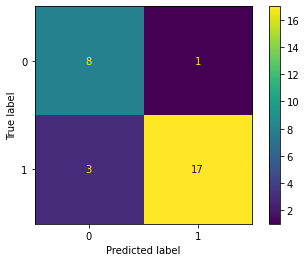

In [60]:
plot_confusion_matrix(lr1, val_new, y_val);

In [70]:
preds1 = lr1.predict(val_new)

print(classification_report(y_val, preds1))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.94      0.85      0.89        20

    accuracy                           0.86        29
   macro avg       0.84      0.87      0.85        29
weighted avg       0.88      0.86      0.87        29



### Save models

In [61]:
# Used for saving out models
import joblib
import datetime

In [65]:
# Todays date as string
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(one_hot, f"./{today}")
joblib.dump(lr, f"./{today}")
joblib.dump(lr1, f"./{today}")

['./2021_12_28']

In [66]:
jl_one_hot = joblib.load(f"./{today}")
jl_model_1 = joblib.load(f"./{today}")
jl_model_2 = joblib.load(f"./{today}")